#### Scenario 
This week as a data scientist consultant, I am working for a real-estate firm in Ames, Iowa. I am building a model to predict house prices. Although currently they have 82 features in their database, they want to save costs and record less data in the future. So, they want me to build a model using only the below subset of features:
```
Lot.Area
Utilities
Neighborhood
Bldg.Type
House.Style
Overall.Qual
Overall.Cond
Year.Built
Year.Remod.Add
Roof.Style
Roof.Matl
Gr.Liv.Area
Full.Bath
Half.Bath
Bedroom.AbvGr
Kitchen.AbvGr
Mo.Sold
Yr.Sold
SalePrice
```
#### Goals
my goal for this project is to findout the followings:
```
1) where the most sales are taking place, 
2) where the most expensive houses are located, and 
3) if this is changing over time.
```

So my task is:

to build them a model to predict house prices
to provide them with an analysis of neighborhoods to answer their question
to provide them with any other insights from the data that I think is important.

Using the provided dataset, I will be creating a linear regression model and an executive summary write-up based on the project outline.


Determine outliers, skew distribution of important variables (if any)
Determine correlations in the data
Validate findings using statistical analysis (p-values, confidence intervals) as applicable
Build a data model

Complete linear regressions using scikit-learn or statsmodels and interpret my findings,
Calculate and plot predicted probabilities and/or present tables of results
Evaluate model fit by using loss functions, including mean absolute error, mean squared error, and root mean squared error, or r-squared
Present the results


# Import Modules & Dataset

In [1]:
from sklearn.preprocessing import MinMaxScaler

# Importing necessary packages
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model as lm
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_predict, cross_val_score, train_test_split
%matplotlib inline
plt.style.use('fivethirtyeight')

# Reading the dataset
data = pd.read_csv("../project-3-house-prices/train.csv")
# take a look at the data
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# these are the only columns I will be using . 
columns_to_use = ["LotArea", "Utilities","Neighborhood","BldgType","HouseStyle", "OverallQual","OverallCond",\
                  "YearBuilt","YearRemodAdd","RoofStyle","RoofMatl","GrLivArea","FullBath","HalfBath",\
                  "BedroomAbvGr","KitchenAbvGr","MoSold","YrSold","SalePrice"]

I am creating a new data frame "df" using only the columns above. In the following codes I will be cleaning the data, exploring the data and visualizing it to get a better idea of what going on. 

In [5]:
# create a dataframe with the only necessary column and name it "df"
df = data[columns_to_use]

In [6]:
df.head()

,LotArea,Utilities,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,MoSold,YrSold,SalePrice
0,8450,AllPub,CollgCr,1Fam,2Story,7,5,2003,2003,Gable,CompShg,1710,2,1,3,1,2,2008,208500
1,9600,AllPub,Veenker,1Fam,1Story,6,8,1976,1976,Gable,CompShg,1262,2,0,3,1,5,2007,181500
2,11250,AllPub,CollgCr,1Fam,2Story,7,5,2001,2002,Gable,CompShg,1786,2,1,3,1,9,2008,223500
3,9550,AllPub,Crawfor,1Fam,2Story,7,5,1915,1970,Gable,CompShg,1717,1,0,3,1,2,2006,140000
4,14260,AllPub,NoRidge,1Fam,2Story,8,5,2000,2000,Gable,CompShg,2198,2,1,4,1,12,2008,250000


In [7]:
df.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

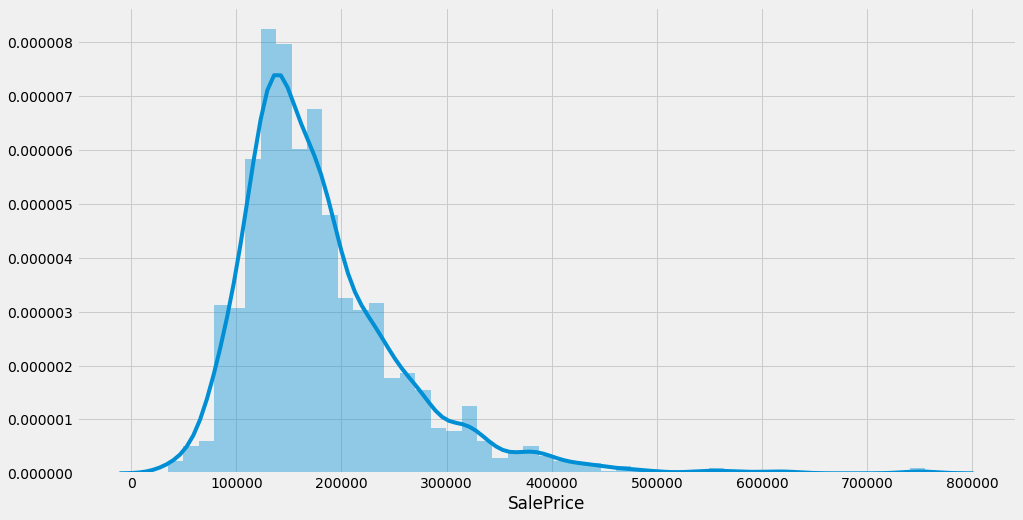

In [8]:
plt.subplots(figsize=(15,8))
sns.distplot(df.SalePrice);

In [9]:
print (df.info())
print (df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 19 columns):
LotArea         1460 non-null int64
Utilities       1460 non-null object
Neighborhood    1460 non-null object
BldgType        1460 non-null object
HouseStyle      1460 non-null object
OverallQual     1460 non-null int64
OverallCond     1460 non-null int64
YearBuilt       1460 non-null int64
YearRemodAdd    1460 non-null int64
RoofStyle       1460 non-null object
RoofMatl        1460 non-null object
GrLivArea       1460 non-null int64
FullBath        1460 non-null int64
HalfBath        1460 non-null int64
BedroomAbvGr    1460 non-null int64
KitchenAbvGr    1460 non-null int64
MoSold          1460 non-null int64
YrSold          1460 non-null int64
SalePrice       1460 non-null int64
dtypes: int64(13), object(6)
memory usage: 216.8+ KB
None
(1460, 19)


In [10]:
df.head()

,LotArea,Utilities,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,MoSold,YrSold,SalePrice
0,8450,AllPub,CollgCr,1Fam,2Story,7,5,2003,2003,Gable,CompShg,1710,2,1,3,1,2,2008,208500
1,9600,AllPub,Veenker,1Fam,1Story,6,8,1976,1976,Gable,CompShg,1262,2,0,3,1,5,2007,181500
2,11250,AllPub,CollgCr,1Fam,2Story,7,5,2001,2002,Gable,CompShg,1786,2,1,3,1,9,2008,223500
3,9550,AllPub,Crawfor,1Fam,2Story,7,5,1915,1970,Gable,CompShg,1717,1,0,3,1,2,2006,140000
4,14260,AllPub,NoRidge,1Fam,2Story,8,5,2000,2000,Gable,CompShg,2198,2,1,4,1,12,2008,250000


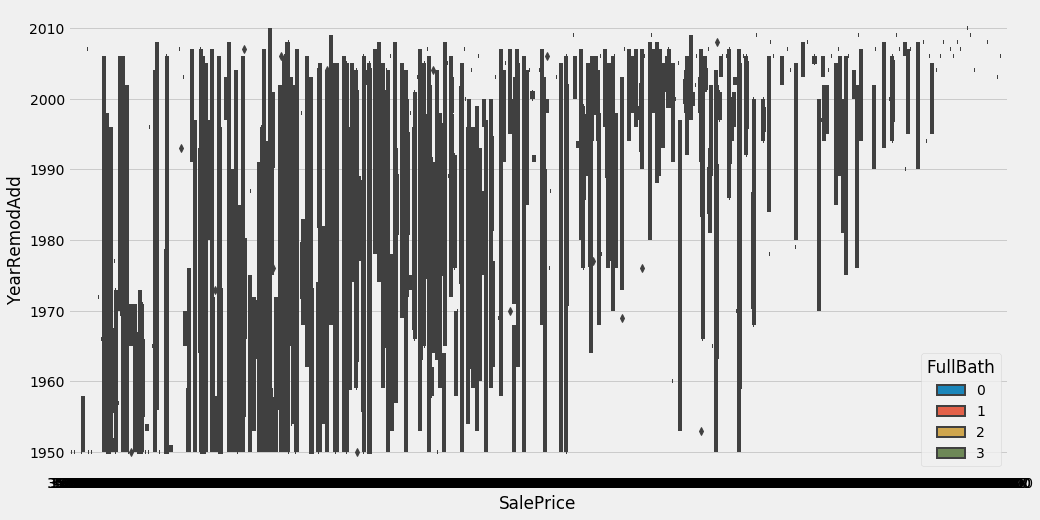

In [11]:
plt.subplots(figsize=(15,8))
sns.boxplot(x = "SalePrice", y = "YearRemodAdd", hue="FullBath",orient='v', data=df )

In [12]:
# Looking for null values
df.isnull().sum()

LotArea         0
Utilities       0
Neighborhood    0
BldgType        0
HouseStyle      0
OverallQual     0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
RoofStyle       0
RoofMatl        0
GrLivArea       0
FullBath        0
HalfBath        0
BedroomAbvGr    0
KitchenAbvGr    0
MoSold          0
YrSold          0
SalePrice       0
dtype: int64

In [13]:
df["YrSold"].value_counts()

2009    338
2007    329
2006    314
2008    304
2010    175
Name: YrSold, dtype: int64

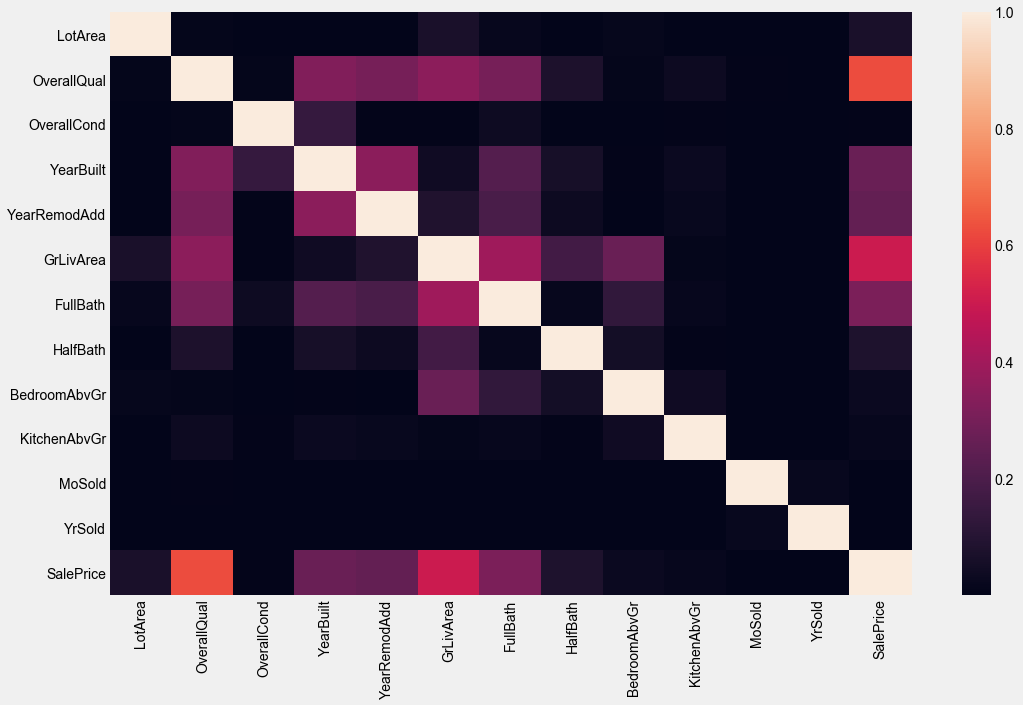

In [14]:
# creating a heat man and trying to see the correlation between variables.
correl = df.corr()**2
fig, ax = plt.subplots(figsize=(16,10))
sns.heatmap(correl);
sns.set(style = "white")
plt.show()

In [15]:
df.head()

,LotArea,Utilities,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,MoSold,YrSold,SalePrice
0,8450,AllPub,CollgCr,1Fam,2Story,7,5,2003,2003,Gable,CompShg,1710,2,1,3,1,2,2008,208500
1,9600,AllPub,Veenker,1Fam,1Story,6,8,1976,1976,Gable,CompShg,1262,2,0,3,1,5,2007,181500
2,11250,AllPub,CollgCr,1Fam,2Story,7,5,2001,2002,Gable,CompShg,1786,2,1,3,1,9,2008,223500
3,9550,AllPub,Crawfor,1Fam,2Story,7,5,1915,1970,Gable,CompShg,1717,1,0,3,1,2,2006,140000
4,14260,AllPub,NoRidge,1Fam,2Story,8,5,2000,2000,Gable,CompShg,2198,2,1,4,1,12,2008,250000


In [16]:
df["Neighborhood"].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [17]:
df["BldgType"].value_counts()

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

In [18]:
df["HouseStyle"].value_counts()

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

In [19]:
type(df.columns[3])

str

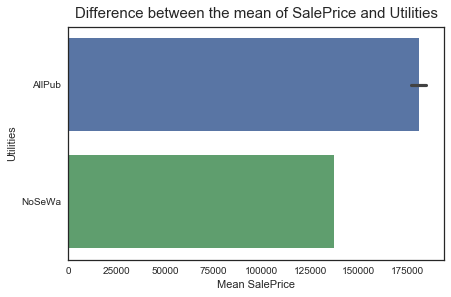

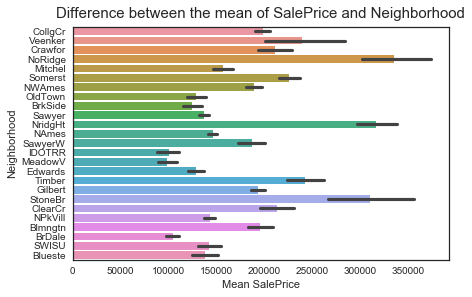

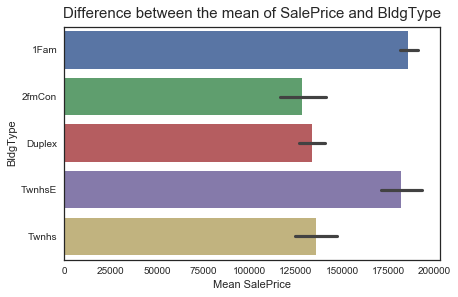

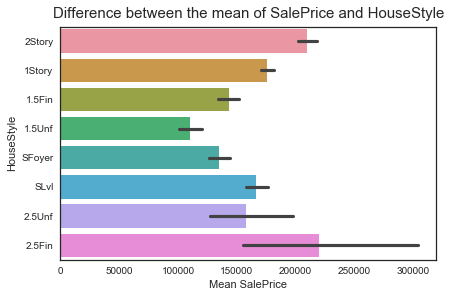

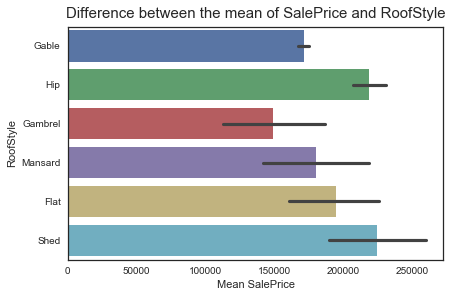

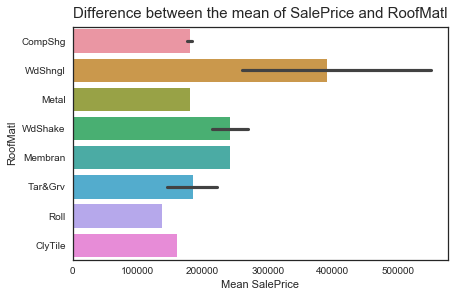

In [20]:
# creating barplots for variable with object type and exploring their relation with "SalePrice"
for i in range(len(df.columns)):
    if df[df.columns[i]].dtype == object:
        sns.barplot(df["SalePrice"], df[df.columns[i]],)
        plt.title("Difference between the mean of SalePrice and "+(df.columns[i]), y = 1.01, fontsize = 15)
        plt.xlabel("Mean SalePrice")
        plt.ylabel(str(df.columns[i]))
        plt.show()

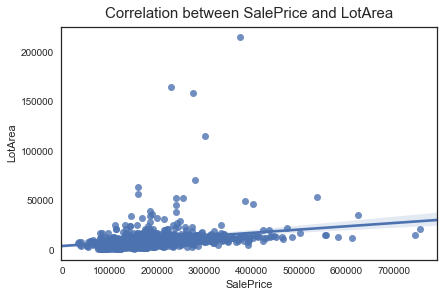

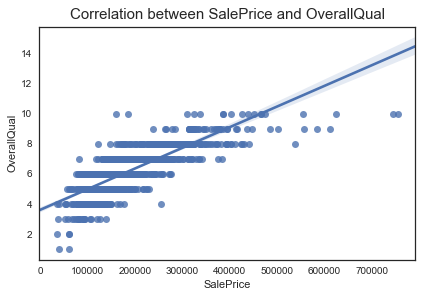

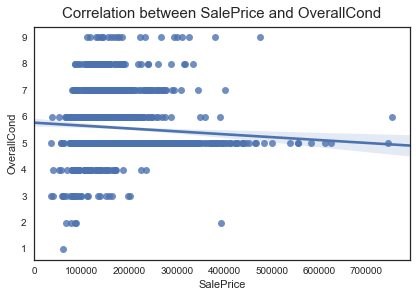

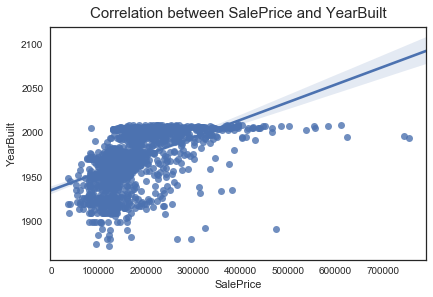

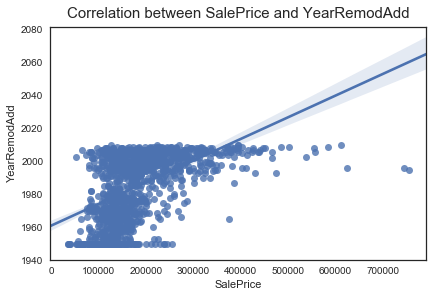

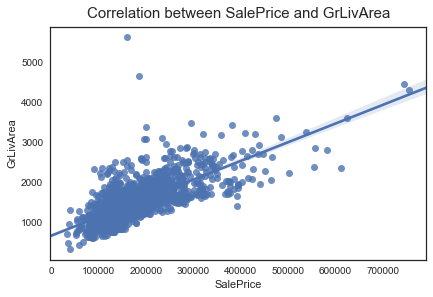

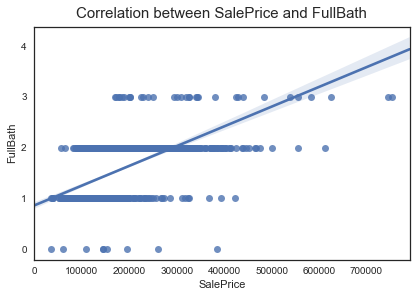

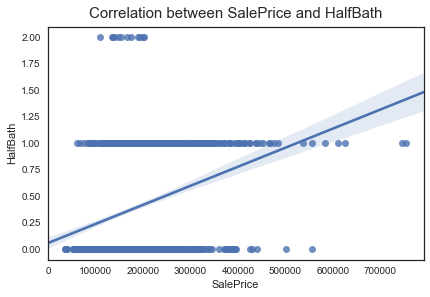

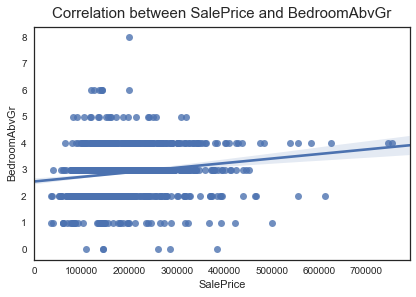

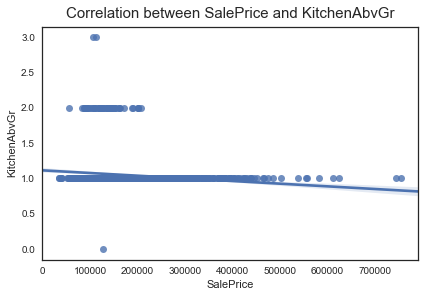

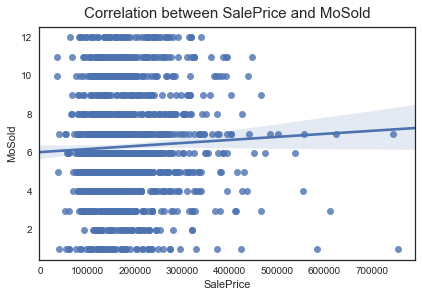

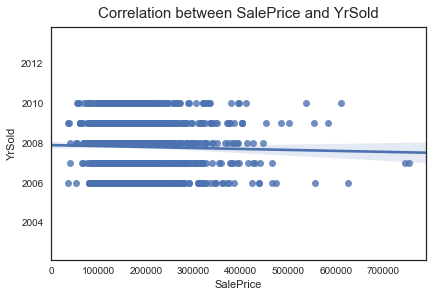

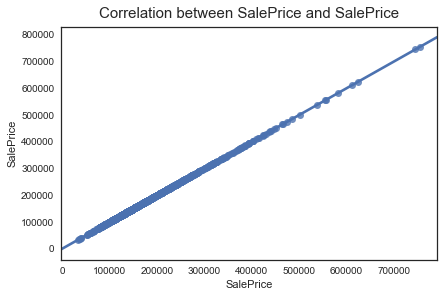

In [21]:
# creating regplots to see the relationship of all columns with SalePrice
for i in range(len(df.columns)):
    if df[df.columns[i]].dtype == int:
        sns.regplot(df["SalePrice"], df[df.columns[i]])
        plt.title("Correlation between SalePrice and "+ (df.columns[i]), y = 1.01, fontsize = 15)
        plt.xlabel("SalePrice")
        plt.ylabel(str(df.columns[i]))
        plt.show()

## Feature Engineering

In [22]:
# Creating dummy variable. 
categories = ['Utilities','Neighborhood',"BldgType", "HouseStyle","RoofStyle", "RoofMatl"]
for category in categories:
   series = df[category]
   dummies = pd.get_dummies(series, prefix=category, drop_first=True)
   df = pd.concat([df, dummies], axis=1)
print (df.columns)

Index(['LotArea', 'Utilities', 'Neighborhood', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'MoSold', 'YrSold', 'SalePrice', 'Utilities_NoSeWa',
       'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide',
       'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR',
       'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU',
       'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker',
       'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs',
       'BldgTy

In [23]:
print ( df.info())
print (df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 67 columns):
LotArea                 1460 non-null int64
Utilities               1460 non-null object
Neighborhood            1460 non-null object
BldgType                1460 non-null object
HouseStyle              1460 non-null object
OverallQual             1460 non-null int64
OverallCond             1460 non-null int64
YearBuilt               1460 non-null int64
YearRemodAdd            1460 non-null int64
RoofStyle               1460 non-null object
RoofMatl                1460 non-null object
GrLivArea               1460 non-null int64
FullBath                1460 non-null int64
HalfBath                1460 non-null int64
BedroomAbvGr            1460 non-null int64
KitchenAbvGr            1460 non-null int64
MoSold                  1460 non-null int64
YrSold                  1460 non-null int64
SalePrice               1460 non-null int64
Utilities_NoSeWa        1460 non-null uint8
Neighbo

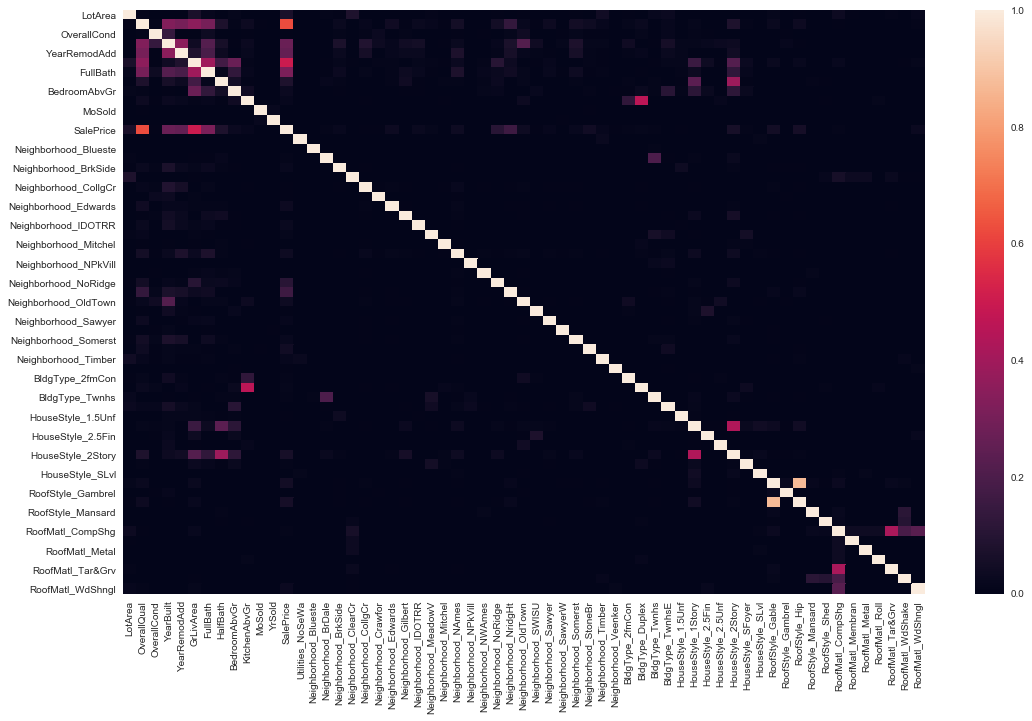

In [24]:
# another heat map including dummy variables
correl = df.corr()**2
fig, ax = plt.subplots(figsize=(16,10))
sns.heatmap(correl);
sns.set(style = "white")
plt.show()

In [25]:
# choose my x values
x = pd.concat([df.ix[:,"LotArea"],df.ix[:,"OverallQual":"YearRemodAdd"],df.ix[:,"GrLivArea":]], axis = 1)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [26]:
## Dropping my target value from x, This is an important step for data processing. 
x = x.drop('SalePrice', 1)

In [27]:
# choose SalePrice as my target variable
y = df.ix[:,"SalePrice"]
# y = df.SalePrice

In [28]:
# Split the dataset into training set and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.33)

In [29]:
# Doing normalization. 
# got the idea from working with Adam on regression challenge and from feature scaling lesson. 

#variables_to_scale = ["LotArea",'YearBuilt', 'YearRemodAdd', 'GrLivArea', 'YrSold']

#df.reset_index(inplace=True)
#scaler = MinMaxScaler()
#df[variables_to_scale] = pd.DataFrame(scaler.fit_transform(df[variables_to_scale]),columns= variables_to_scale)

In [33]:
# Create a linear regression model 
lr = lm.LinearRegression(normalize= True)
lr_model = lr.fit(X_train, y_train)
Y_pred = lr_model.predict(X_test)

# calculate r2
r2 = r2_score(y_true = y_test, y_pred = Y_pred)
print ("R_squared:", r2)
print ("mean squared error: ", mean_squared_error(y_test, Y_pred))
print ("Model Intercept: ",lr_model.intercept_)

R_squared: -1.30501049322e+22
mean squared error:  6.83395616499e+31
Model Intercept:  1.04784968252e+17


In [34]:
print (abs(lr_model.coef_).mean())
print (max(lr_model.coef_))
print (len(lr_model.coef_))
lr_model.coef_

8.73208068774e+15
68277.6217617
60


array([  7.62245944e-01,   1.30584575e+04,   6.92202788e+03,
         6.00924387e+02,   7.99198690e+01,   9.64894626e+01,
         8.22544988e+02,   1.67205210e+03,  -1.05639645e+04,
        -1.95783787e+04,  -6.38891128e+02,  -5.51994399e+02,
        -2.84006694e+04,   9.21757698e+03,   3.06444701e+04,
         1.38318460e+04,  -8.79820930e+03,   2.10950758e+03,
         2.47076216e+04,   5.37972627e+03,  -8.81077470e+03,
         2.83511726e+03,   3.36398866e+04,  -2.80671827e+03,
        -6.92268023e+02,   3.06698828e+04,  -1.48704377e+04,
         3.59727151e+04,   5.95841982e+04,   2.66088947e+02,
         1.35387916e+03,   1.45403026e+03,   4.63796528e+02,
         1.87064925e+04,   6.25604381e+04,   5.31551598e+03,
         2.89413608e+04,   7.45218449e+03,  -7.43086815e+03,
        -5.00793664e+04,  -2.97793510e+04,   2.47818029e+04,
         2.13221161e+04,  -4.15144831e+04,  -1.29613756e+04,
        -1.99210114e+03,   3.14007597e+04,   1.75736280e+04,
        -1.90355466e+04,

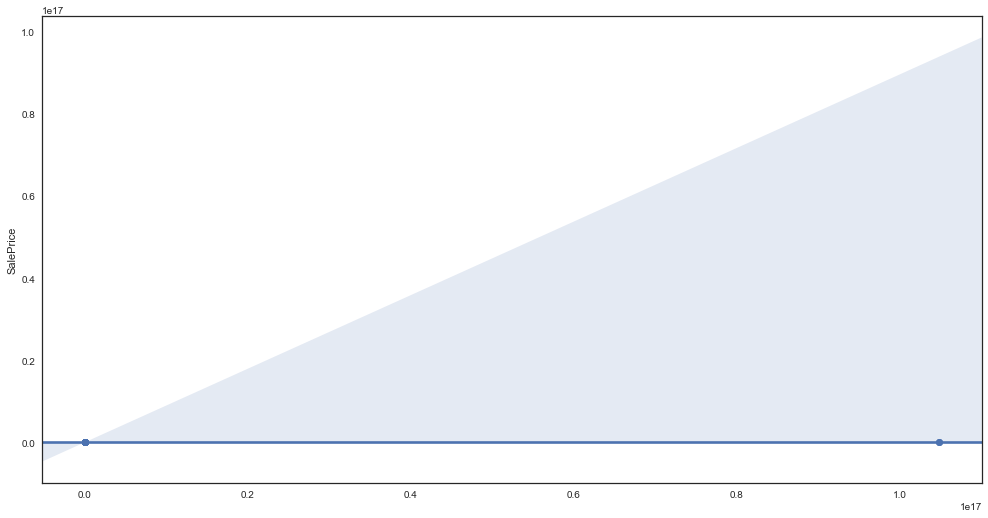

In [35]:
fig, ax = plt.subplots(figsize = (15,8))
ax = sns.regplot(Y_pred, y_test)
plt.show()

In [37]:
# create a Linear RidgeCV model 
ridge = lm.RidgeCV(alphas = (.1,1,10),normalize= True)
lrd_model = ridge.fit(X_train, y_train)
Y_pred_R = lrd_model.predict(X_test)
r2 = r2_score(y_true = y_test, y_pred = Y_pred_R)

print ("R_squared:", r2)
print ("mean squared error: ", mean_squared_error(y_test, Y_pred_R))
print ("Model Intercept: ",lrd_model.intercept_)

R_squared: 0.734371503906
mean squared error:  1391018315.87
Model Intercept:  -1648.96620901


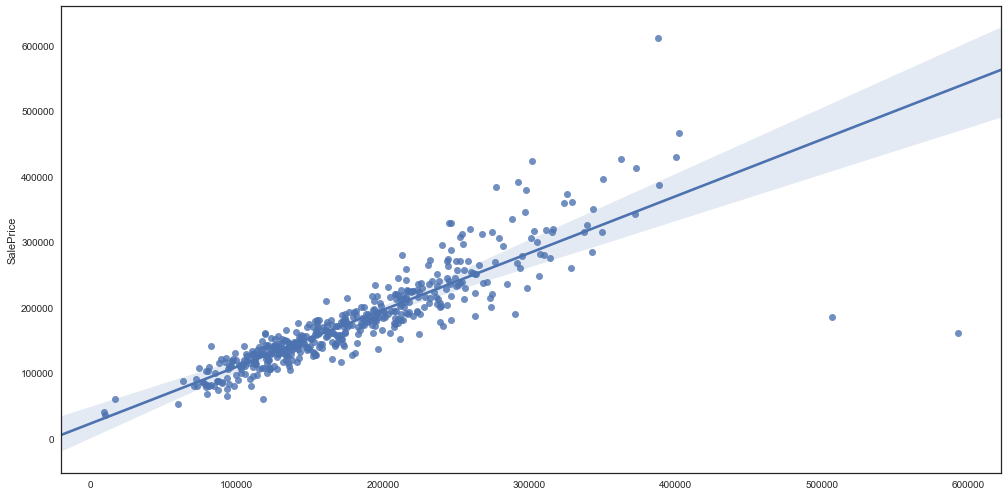

In [38]:
fig, ax = plt.subplots(figsize = (15,8))
ax = sns.regplot(Y_pred_R, y_test)
plt.show()

In [39]:
# model cooef's
print (len(lrd_model.coef_))
print (abs(lrd_model.coef_).mean())
print (abs(lrd_model.coef_).max())

lrd_model.coef_

60
14371.93592
72814.5587082


array([  7.90709575e-01,   1.44421650e+04,   4.52944525e+03,
         4.06325163e+02,   2.22650635e+02,   6.83734458e+01,
         9.19419986e+03,   4.87801205e+03,  -6.25963339e+03,
        -1.71158053e+04,  -5.61021807e+02,  -6.24698089e+02,
        -2.00117770e+04,  -2.87637652e+03,   9.92494689e+03,
         1.02815974e+03,  -9.99243260e+03,  -4.59636160e+03,
         1.80564293e+04,  -6.30635119e+03,  -1.71922437e+04,
        -1.32345752e+04,   1.59331966e+04,  -7.87101782e+03,
        -7.29199758e+03,   1.03363700e+04,  -1.76820805e+04,
         3.93907012e+04,   5.34830921e+04,  -1.13296131e+04,
        -1.31126423e+04,  -8.05486446e+03,  -4.92932786e+03,
         8.37846723e+03,   5.74332114e+04,  -5.32794363e+02,
         2.74392324e+04,   2.28443794e+03,  -7.49434632e+03,
        -4.46518031e+04,  -2.55828909e+04,   1.36634851e+04,
         1.14926549e+04,  -2.11864846e+04,  -1.39121235e+04,
        -3.68226103e+03,   2.06095618e+04,   8.14438261e+03,
        -7.01255961e+03,

In [40]:
# creating a Linear Lasso model
lasso = lm.LassoCV(n_alphas=20, normalize= True)
lls_model = lasso.fit(X_train, y_train)
Y_pred_L = lls_model.predict(X_test)
r2 = r2_score(y_true = y_test, y_pred = Y_pred_L)
mse = mean_squared_error(y_test, Y_pred_L)

print ("R_squared:", r2)
print ("mean squared error: ", mse)
print ("Model Intercept: ",lls_model.intercept_)


R_squared: 0.70142647845
mean squared error:  1563541725.45
Model Intercept:  -1342992.65724


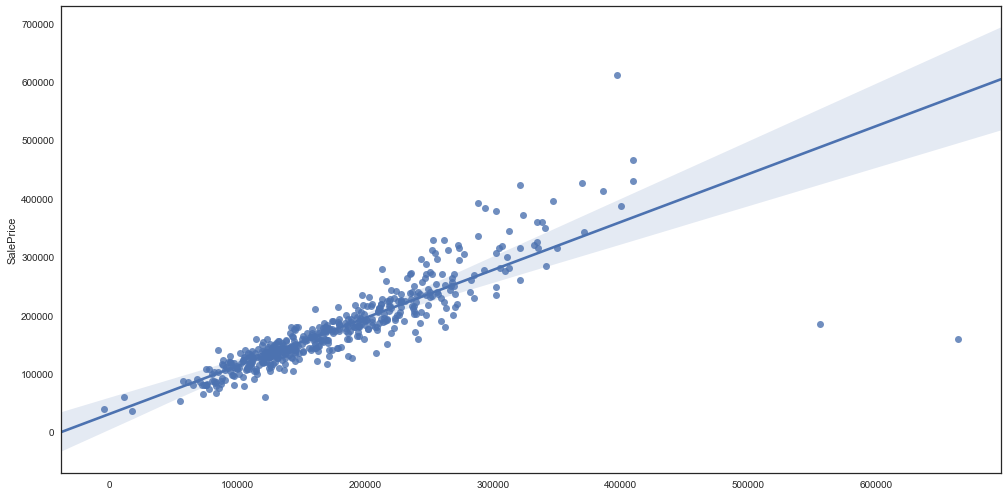

In [41]:
fig, ax = plt.subplots(figsize = (15,8))
ax = sns.regplot(Y_pred_L, y_test)
plt.show()

In [42]:
print (len(lls_model.coef_))
print (abs(lls_model.coef_).mean())
print (abs(lls_model.coef_).max())
lls_model.coef_

60
10377.4250475
65343.2851182


array([  7.30647698e-01,   1.45536000e+04,   5.60936729e+03,
         5.57846115e+02,   9.83846537e+01,   9.00566093e+01,
         0.00000000e+00,   0.00000000e+00,  -9.38895302e+03,
        -1.62708972e+04,  -3.67915382e+02,  -0.00000000e+00,
        -9.83807616e+02,  -0.00000000e+00,   8.86457425e+03,
         7.23947519e+03,  -6.10848250e+02,  -0.00000000e+00,
         1.91509154e+04,   1.76067111e+01,  -8.49406313e+03,
        -0.00000000e+00,   1.65171362e+04,  -8.13051330e+02,
        -8.69835811e+02,   9.40495062e+03,  -1.20068840e+04,
         3.30756502e+04,   5.30071072e+04,  -1.60929358e+03,
        -4.89113942e+02,   0.00000000e+00,  -0.00000000e+00,
         1.05086876e+04,   5.41029984e+04,   0.00000000e+00,
         1.90668738e+04,   0.00000000e+00,  -5.78617962e+03,
        -3.88121420e+04,  -2.28203113e+04,   1.41427532e+04,
         1.67826794e+04,  -2.88031131e+04,  -5.22002652e+03,
        -1.00256137e+03,   2.07515366e+04,   8.54019219e+03,
        -1.46808771e+03,

In [43]:
print ("linear regression score:",cross_val_score(lr, X_train, y_train, n_jobs=-1, cv=5))
print ("Linear Ridge score:", cross_val_score(ridge, X_train, y_train, n_jobs=-1, cv=5))
print ("Linear lasso score:", cross_val_score(lasso, X_train, y_train, n_jobs=-1, cv=5))



linear regression score: [ -3.43583641e+23   8.56857114e-01   8.81261596e-01  -4.48537260e+24
   8.31224776e-01]
Linear Ridge score: [ 0.84460969  0.85549089  0.87553916  0.86640155  0.81039107]
Linear lasso score: [ 0.84558412  0.86057529  0.87904938  0.86277733  0.81463689]


In [44]:
print (lr_model.score(X_test,y_test))
print (lrd_model.score(X_test, y_test))
print (lls_model.score(X_test,y_test))

-1.30501049322e+22
0.734371503906
0.70142647845


In [46]:
## borrowed this piece of code from Munur
print ((sum((np.log(Y_pred+1)-np.log(y_test))**2)/len(y_test))**.5)
print ((sum((np.log(Y_pred_R+1)-np.log(y_test))**2)/len(y_test))**.5)
print ((sum((np.log(Y_pred_L+1)-np.log(y_test))**2)/len(y_test))**.5)

2.15925282402
0.191494071092
nan


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.


In [47]:
df.head()

,LotArea,Utilities,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,...,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl
0,8450,AllPub,CollgCr,1Fam,2Story,7,5,2003,2003,Gable,...,0,0,0,1,0,0,0,0,0,0
1,9600,AllPub,Veenker,1Fam,1Story,6,8,1976,1976,Gable,...,0,0,0,1,0,0,0,0,0,0
2,11250,AllPub,CollgCr,1Fam,2Story,7,5,2001,2002,Gable,...,0,0,0,1,0,0,0,0,0,0
3,9550,AllPub,Crawfor,1Fam,2Story,7,5,1915,1970,Gable,...,0,0,0,1,0,0,0,0,0,0
4,14260,AllPub,NoRidge,1Fam,2Story,8,5,2000,2000,Gable,...,0,0,0,1,0,0,0,0,0,0


# The following chart shows top sale houses and average sale prices in each Neighborhood

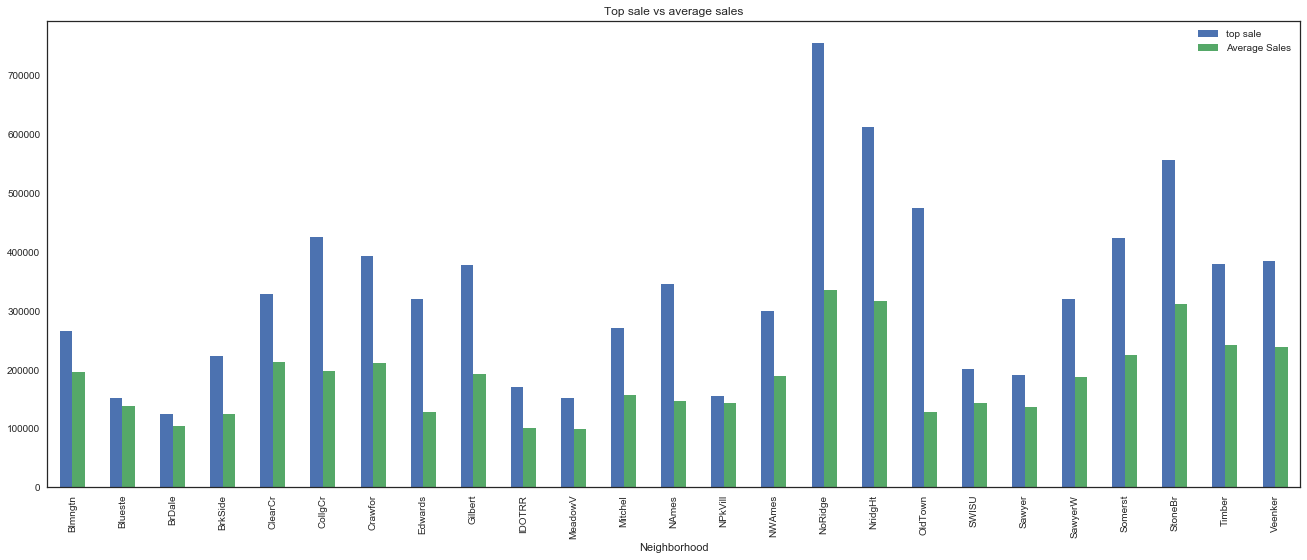

In [56]:
ax = pd.pivot_table(df, values="SalePrice", index = "Neighborhood", aggfunc= [max, np.mean])
ax.columns = ["top sale", "Average Sales"]
ax.plot(kind = "bar", figsize = (20,8), title="Top sale vs average sales")
plt.show()


# Neighborhood with most sales:


In [49]:
most_sales = df["Neighborhood"].value_counts().to_frame()

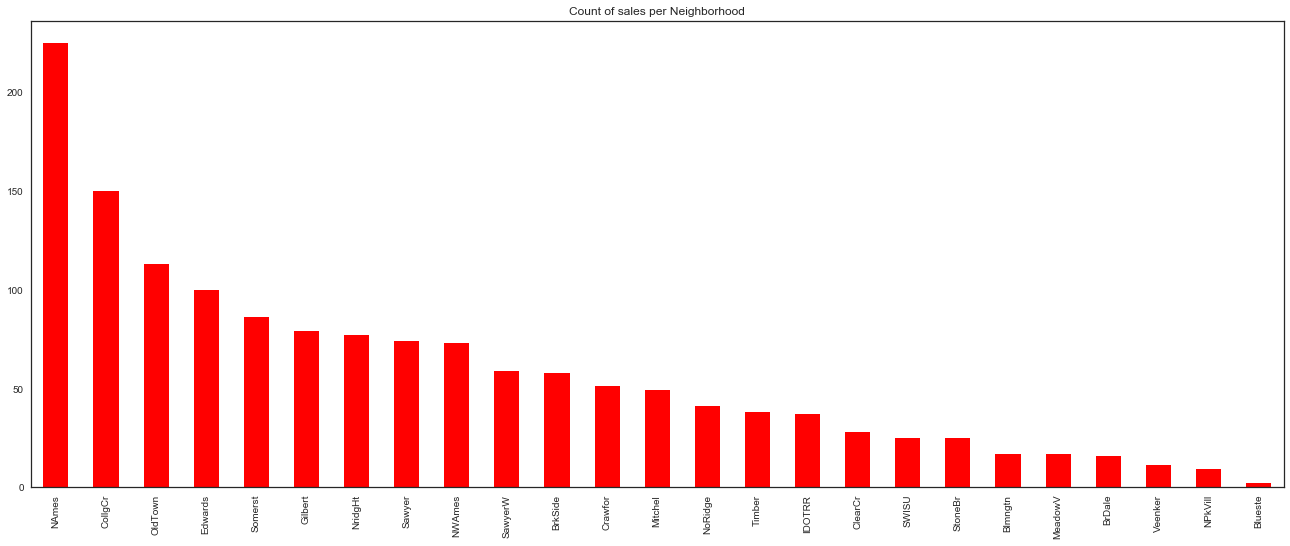

In [50]:
ax = most_sales.plot(kind='bar', figsize = (20,8), title="Count of sales per Neighborhood", legend= False,color = "Red", )
plt.show()

# The following line chart shows how prices are changing over time. 

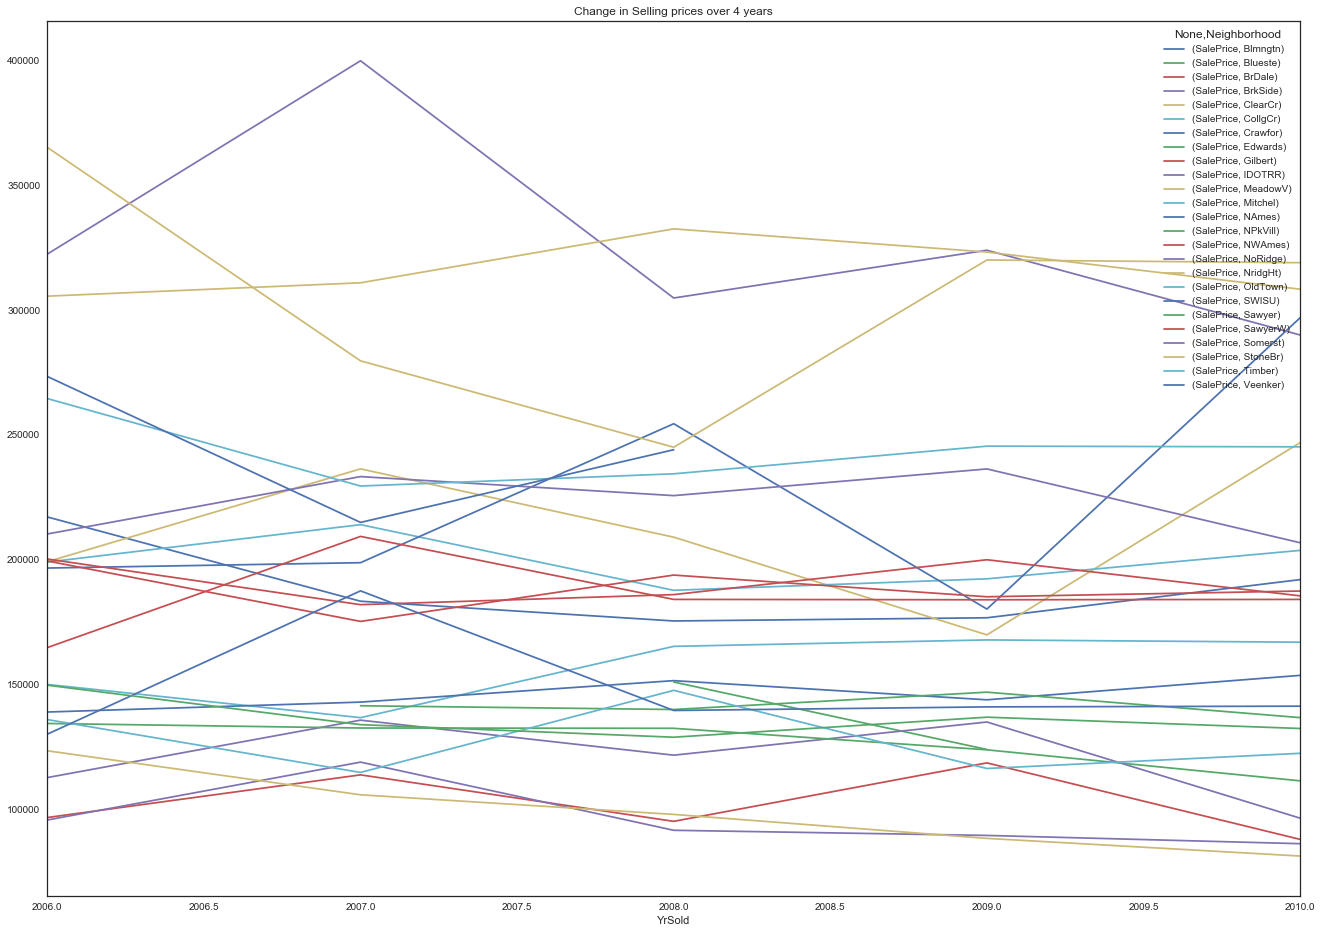

In [51]:
# I wish there is better way I can visualize this chart, 
# Surely I will come back to this project with more knowledge
pd.pivot_table(df, index =["YrSold"],columns="Neighborhood",\
               values=["SalePrice"]).plot(kind='line',\
        title = "Change in Selling prices over 4 years", figsize = (20,15))
plt.show()

In [52]:
pd.pivot_table(df, index =["YrSold"],columns="Neighborhood",\
               values=["SalePrice"])

SalePrice                                                         \
Neighborhood   Blmngtn   Blueste         BrDale        BrkSide        ClearCr   
YrSold                                                                          
2006          217087.0       NaN   96750.000000  112746.666667  199166.666667   
2007          183350.5       NaN  113833.333333  135737.500000  236333.333333   
2008          175447.5  151000.0   95225.000000  121707.142857  208991.500000   
2009          176720.0  124000.0  118625.000000  134994.117647  169875.000000   
2010          192000.0       NaN   88000.000000   96500.000000  246850.000000   

                                                                          \
Neighborhood        CollgCr        Crawfor        Edwards        Gilbert   
YrSold                                                                     
2006          199016.406250  196635.181818  134403.684211  200250.625000   
2007          213999.933333  198777.578947  132588.235294  181967.947368   
2008          187718.055556  254411.111111  132473.076923  186000.000000   
2009          192317.769231  180211.111111  123855.555556  199955.000000   
2010          203700.000000  296833.333333  111445.454545  185500.000000   

                                 ...                                      \
Neighborhood         IDOTRR      ...              NoRidge        NridgHt   
YrSold                           ...                                       
2006           95758.714286      ...        322333.333333  305491.882353   
2007          118933.333333      ...        399730.909091  310833.111111   
2008           91642.857143      ...        304750.000000  332422.833333   
2009           89580.000000      ...        323875.000000  323143.500000   
2010           86278.166667      ...        289938.285714  308281.125000   

                                                                          \
Neighborhood        OldTown          SWISU         Sawyer        SawyerW   
YrSold                                                                     
2006          135963.807692  130125.000000  149735.294118  164787.500000   
2007          114794.625000  187500.000000  133935.294118  209300.000000   
2008          147670.000000  139612.500000  128900.692308  184080.000000   
2009          116378.291667  141048.000000  136925.727273  183934.133333   
2010          122464.285714  141333.333333  132400.000000  184076.923077   

                                                                          
Neighborhood        Somerst        StoneBr         Timber        Veenker  
YrSold                                                                    
2006          210268.875000  365046.666667  264485.714286  273333.333333  
2007          233248.916667  279585.200000  229470.545455  214900.000000  
2008          225631.000000  245000.000000  234361.000000  244000.000000  
2009          236315.000000  319967.400000  245437.500000            NaN  
2010          206762.500000  318886.400000  245160.000000            NaN  

[5 rows x 25 columns]